In [8]:
import numpy as np 
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io


In [2]:
df = pd.read_csv('datasets/financial_regression.csv')

In [5]:
df['date'] = pd.to_datetime(df['date'])

if any(['us_rates_%', 'CPI', 'GDP']) in df.columns:
    df = df.drop(labels = ['us_rates_%', 'CPI', 'GDP'], axis=1)

df.isnull().sum()
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

date                  0
sp500 open            0
sp500 high            0
sp500 low             0
sp500 close           0
sp500 volume          0
sp500 high-low        0
nasdaq open           0
nasdaq high           0
nasdaq low            0
nasdaq close          0
nasdaq volume         0
nasdaq high-low       0
us_rates_%            0
CPI                   0
usd_chf               0
eur_usd               0
GDP                   0
silver open           0
silver high           0
silver low            0
silver close          0
silver volume         0
silver high-low       0
oil open              0
oil high              0
oil low               0
oil close             0
oil volume            0
oil high-low          0
platinum open         0
platinum high         0
platinum low          0
platinum close        0
platinum volume       0
platinum high-low     0
palladium open        0
palladium high        0
palladium low         0
palladium close       0
palladium volume      0
palladium high-l

In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                3904 non-null   datetime64[ns]
 1   sp500 open          3904 non-null   float64       
 2   sp500 high          3904 non-null   float64       
 3   sp500 low           3904 non-null   float64       
 4   sp500 close         3904 non-null   float64       
 5   sp500 volume        3904 non-null   float64       
 6   sp500 high-low      3904 non-null   float64       
 7   nasdaq open         3904 non-null   float64       
 8   nasdaq high         3904 non-null   float64       
 9   nasdaq low          3904 non-null   float64       
 10  nasdaq close        3904 non-null   float64       
 11  nasdaq volume       3904 non-null   float64       
 12  nasdaq high-low     3904 non-null   float64       
 13  us_rates_%          3904 non-null   float64     

<Axes: >

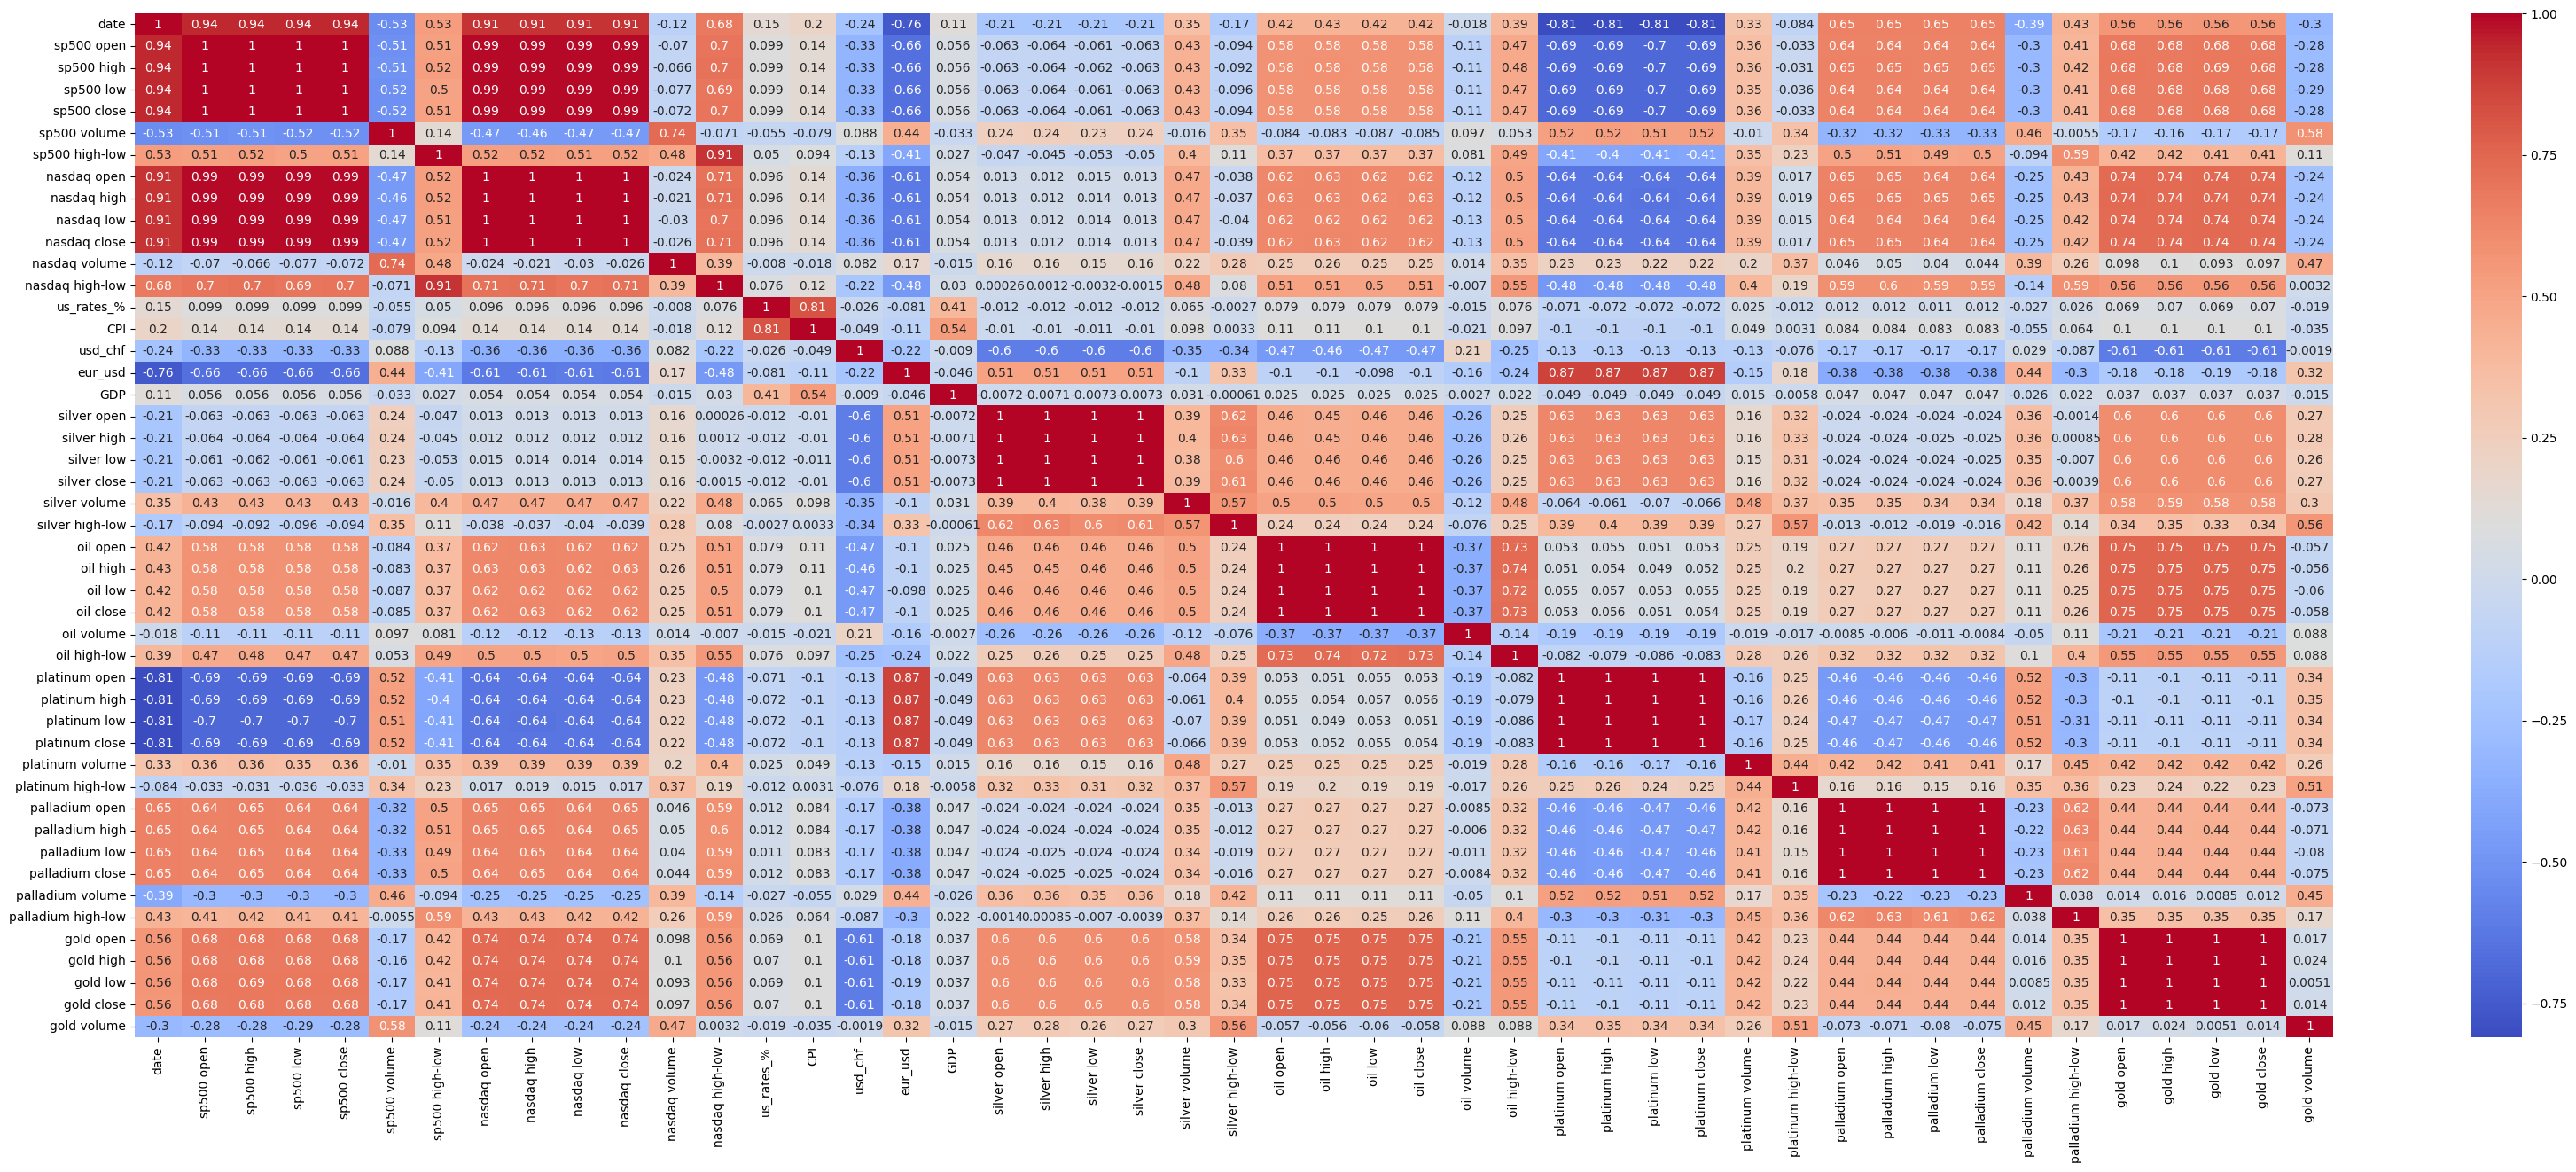

In [6]:
corr = df.corr()
plt.figure(figsize=(40,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [7]:
target = 'gold high'
corr_target = df.corr()[target].sort_values(ascending=False)
print(corr_target)

gold high             1.000000
gold open             0.999763
gold close            0.999743
gold low              0.999615
oil close             0.754128
oil high              0.753989
oil low               0.753890
oil open              0.753869
nasdaq high           0.736806
nasdaq open           0.736407
nasdaq close          0.736326
nasdaq low            0.735915
sp500 high            0.679919
sp500 close           0.679190
sp500 open            0.679174
sp500 low             0.678383
silver low            0.602635
silver close          0.602058
silver open           0.601710
silver high           0.601463
silver volume         0.586430
nasdaq high-low       0.559368
date                  0.557238
oil high-low          0.554446
palladium high        0.440258
palladium open        0.438780
palladium close       0.438294
palladium low         0.436607
platinum volume       0.422370
sp500 high-low        0.418188
palladium high-low    0.354457
silver high-low       0.349777
platinum

# Датасет для тем 3-4, 6

In [8]:
features = ['date','eur_usd', 'silver high', 'silver volume', 'oil high', 'palladium high']
target = ['gold high']
df_gold_high = df[features + target]
df_gold_high

,date,eur_usd,silver high,silver volume,oil high,palladium high,gold high
0,2010-01-14,1.447800,18.70000,6.980400e+04,39.440000,45.020000,112.370000
1,2010-01-15,1.437600,18.54000,2.051060e+05,39.020000,45.760000,112.010000
2,2010-01-18,1.191437,21.60806,3.857973e+05,35.026189,110.184473,146.101477
3,2010-01-19,1.426900,18.79000,1.305520e+05,38.949900,47.080000,111.750000
4,2010-01-20,1.409400,18.31000,2.309070e+05,38.350000,47.310000,110.050000
...,...,...,...,...,...,...,...
3899,2024-10-17,1.083700,30.58000,6.753110e+05,72.840000,96.025900,249.060000
3900,2024-10-18,1.085400,32.17000,1.167147e+06,71.920000,99.660000,251.370000
3901,2024-10-21,1.191437,32.71500,1.446558e+06,72.870100,98.350000,253.140000
3902,2024-10-22,1.191437,33.31000,1.702196e+06,74.650000,99.589900,253.940000


In [11]:
df_gold_high.to_csv('./datasets/gold_price_regression.csv')

# Датасет для темы 5

In [21]:
df['gold_trend'] = (df['gold close'] >= df['gold open']).astype(int)

# 2. Формирование списка нужных колонок
features_list = [
    'date',
    'silver open', 'silver close',
    'oil open', 'oil close',
    'nasdaq open', 'nasdaq close',
    'sp500 open', 'sp500 close',
    'gold_trend'
]

bin_reg_df = df[features_list].copy()

print("Итоговый датасет:")
display(bin_reg_df.head())


Итоговый датасет:


,date,silver open,silver close,oil open,oil close,nasdaq open,nasdaq close,sp500 open,sp500 close,gold_trend
0,2010-01-14,18.580000,18.660000,39.30000,39.060000,46.260000,46.390000,114.490000,114.930000,1
1,2010-01-15,18.540000,18.410000,38.97000,38.400000,46.460000,45.850000,114.730000,113.640000,0
2,2010-01-18,21.434665,21.428163,34.67196,34.666103,181.394495,181.431795,268.732724,268.779352,0
3,2010-01-19,18.530000,18.790000,38.07000,38.930000,45.960000,46.590000,113.620000,115.060000,1
4,2010-01-20,18.310000,17.860000,38.23000,37.890000,46.270000,45.920000,114.280000,113.890000,0


In [ ]:
# # Функция для создания бинарного признака
# # Возвращает 1, если Close >= Open (цена выросла или не изменилась), иначе 0
# def calculate_trend(row, asset_name):
#     open_col = f"{asset_name} open"
#     close_col = f"{asset_name} close"
    
#     if open_col in row.index and close_col in row.index:
#         if row[close_col] >= row[open_col]:
#             return 1
#         else:
#             return 0
#     return None

# df['gold_trend'] = df.apply(lambda row: calculate_trend(row, 'gold'), axis=1)

# assets_to_analyze = ['silver', 'oil', 'nasdaq', 'sp500', 'palladium']
# feature_columns = []

# for asset in assets_to_analyze:
#     col_name = f"{asset}_trend"
#     df[col_name] = df.apply(lambda row: calculate_trend(row, asset), axis=1)
#     feature_columns.append(col_name)


# final_columns = ['date'] + feature_columns + ['gold_trend']
# bin_reg_df = df[final_columns].copy()

# print("Датасет:")
# display(bin_reg_df.head())

Датасет:


,date,silver_trend,oil_trend,nasdaq_trend,sp500_trend,palladium_trend,gold_trend
0,2010-01-14,1,0,1,1,1,1
1,2010-01-15,0,0,0,0,1,0
2,2010-01-18,0,0,1,1,0,0
3,2010-01-19,1,1,1,1,1,1
4,2010-01-20,0,0,0,0,1,0


In [22]:
bin_reg_df.to_csv('gold_binary_regression.csv', index=False)

In [ ]:
bin_reg_df[bin_reg_df['gold_trend'] < 0]

,date,silver_trend,oil_trend,nasdaq_trend,sp500_trend,palladium_trend,gold_trend
